K-Means聚类最重要的应用之一是非结构数据（图像，声音）上的矢量量化（VQ）。非结构化数据往往占用比较
多的储存空间，文件本身也会比较大，运算非常缓慢，我们希望能够在保证数据质量的前提下，尽量地缩小非结构
化数据的大小，或者简化非结构化数据的结构。矢量量化就可以帮助我们实现这个目的。KMeans聚类的矢量量化
本质是一种降维运用，但它与我们之前学过的任何一种降维算法的思路都不相同。特征选择的降维是直接选取对模
型贡献最大的特征，PCA的降维是聚合信息，而矢量量化的降维是在同等样本量上压缩信息的大小，即不改变特征
的数目也不改变样本的数目，只改变在这些特征下的样本上的信息量。
用K-Means聚类中获得的质心来替代原有的数据，可以把数据上的信息量压缩到非常小，但又不损失太多信息。我
们接下来就通过一张图图片的矢量量化来看一看K-Means如何实现压缩数据大小，却不损失太多信息量。+

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#两个序列中的点进行距离匹配的函数
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
#导入图片所需要使用的库
from sklearn.utils import shuffle

In [3]:
n_cluster=64
china=load_sample_image("china.jpg")

In [5]:
china.shape

(427, 640, 3)

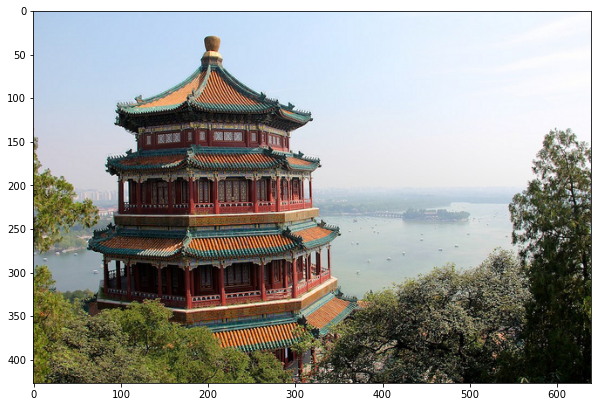

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(china)

In [13]:
#将三维的数组转变为二维
newimage=china.reshape((427*640,3))

In [18]:
newimage

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [ 43,  49,  39],
       [ 13,  21,   6],
       [ 15,  24,   7]], dtype=uint8)

In [15]:
#将重复的颜色去掉
import pandas as pd
pd.DataFrame(newimage).drop_duplicates().shape

E:\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(96615, 3)

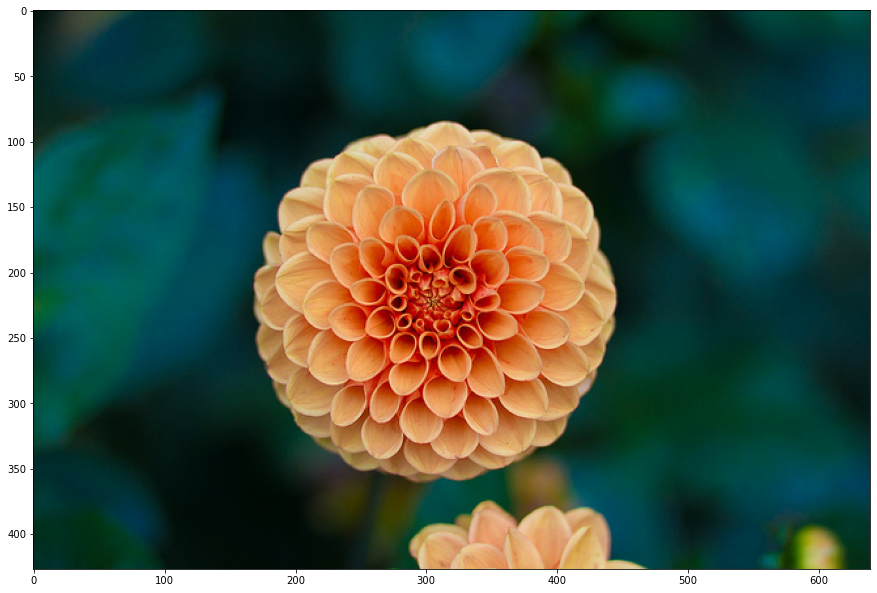

In [17]:
flower=load_sample_image("flower.jpg")
plt.figure(figsize=(15,15))
plt.imshow(flower)

图像探索完毕，我们了解了，图像现在有9W多种颜色。我们希望来试试看，能否使用K-Means将颜色压缩到64
种，还不严重损耗图像的质量。为此，我们要使用K-Means来将9W种颜色聚类成64类，然后使用64个簇的质心来
替代全部的9W种颜色，记得质心有着这样的性质：簇中的点都是离质心最近的样本点。
为了比较，我们还要画出随机压缩到64种颜色的矢量量化图像。我们需要随机选取64个样本点作为随机质心，计
算原数据中每个样本到它们的距离来找出离每个样本最近的随机质心，然后用每个样本所对应的随机质心来替换原
本的样本。两种状况下，我们观察图像可视化之后的状况，以查看图片信息的损失。
在这之前，我们需要把数据处理成sklearn中的K-Means类能够接受的数据。

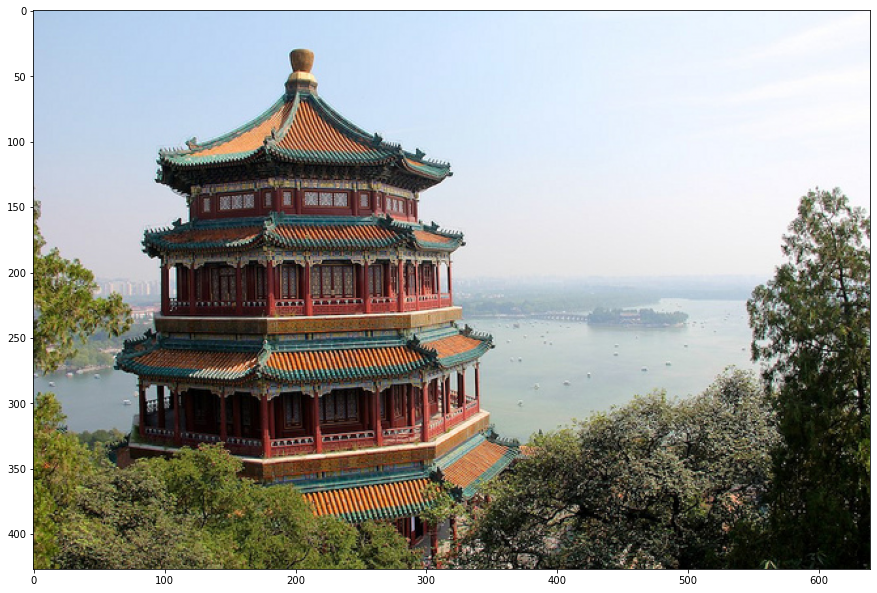

In [24]:
#将图像的数据压缩到[0,1]之间，可以让plt.imshow()表现的更好
china=np.array(china,dtype=np.float64)/china.max()
plt.figure(figsize=(15,15))
plt.imshow(china)

In [25]:
# 获取图片的长宽和三通道
w,h,d=tuple(china.shape)

In [26]:
w

427

In [27]:
h

640

In [28]:
d

3

In [33]:
image_array=np.reshape(china,(w*h,d))

In [35]:
image_array.shape

(273280, 3)

In [68]:
#然后就对数据使用矢量化
image_array_sample=shuffle(image_array,random_state=0)[:1000]
kmeans=KMeans(n_clusters=n_cluster,random_state=0).fit(image_array_sample)
#获得质心
kmeans.cluster_centers_

array([[0.11798806, 0.11884058, 0.07007673],
       [0.80874811, 0.82262443, 0.85671192],
       [0.47614379, 0.46895425, 0.27124183],
       [0.92831097, 0.95803234, 0.99566563],
       [0.52      , 0.5254902 , 0.39529412],
       [0.61895425, 0.67712418, 0.70816993],
       [0.31198257, 0.34030501, 0.18954248],
       [0.82923351, 0.90641711, 0.98743316],
       [0.80392157, 0.53006536, 0.3751634 ],
       [0.25202614, 0.23764706, 0.20104575],
       [0.03328773, 0.02836297, 0.01732786],
       [0.3454902 , 0.1854902 , 0.12470588],
       [0.52156863, 0.49150327, 0.52592593],
       [0.74457516, 0.83934641, 0.95045752],
       [0.72941176, 0.35764706, 0.23137255],
       [0.41470588, 0.44656863, 0.40980392],
       [0.96176471, 0.77058824, 0.63039216],
       [0.69019608, 0.74705882, 0.7605042 ],
       [0.57019608, 0.41098039, 0.34588235],
       [0.93630422, 0.93594771, 0.94913844],
       [0.3875817 , 0.45620915, 0.10588235],
       [0.56684492, 0.62388592, 0.64171123],
       [0.

In [39]:
labels=kmeans.predict(image_array)
labels.shape

(273280,)

In [70]:
from sklearn.metrics import silhouette_score
silhouette_score(china.reshape(w*h,3),labels)

0.3084214719620071

In [41]:
image_kmeans=image_array.copy()

In [48]:
image_kmeans

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [47]:
kmeans.cluster_centers_.shape

(64, 3)

In [50]:
#将原来的27万行数据全部替换未质心里面的数据
for i in range(image_kmeans.shape[0]):
    image_kmeans[i]=kmeans.cluster_centers_[labels[i]]

In [66]:
image_kmeans.shape

(273280, 3)

In [53]:
#对数据进行随机矢量化
centroid_random=shuffle(image_array,random_state=0)[:n_cluster]
labels_random=pairwise_distances_argmin(centroid_random,image_array,axis=0)

In [55]:
labels_random

array([55, 55, 55, ..., 52, 60, 60], dtype=int64)

In [56]:
len(set(labels_random))

64

In [57]:
image_random=image_array.copy()
for i in range(w*h):
    image_random[i]=centroid_random[labels_random[i]]
image_random

array([[0.72941176, 0.82352941, 0.9254902 ],
       [0.72941176, 0.82352941, 0.9254902 ],
       [0.72941176, 0.82352941, 0.9254902 ],
       ...,
       [0.21568627, 0.16078431, 0.10980392],
       [0.04313725, 0.0745098 , 0.02352941],
       [0.04313725, 0.0745098 , 0.02352941]])

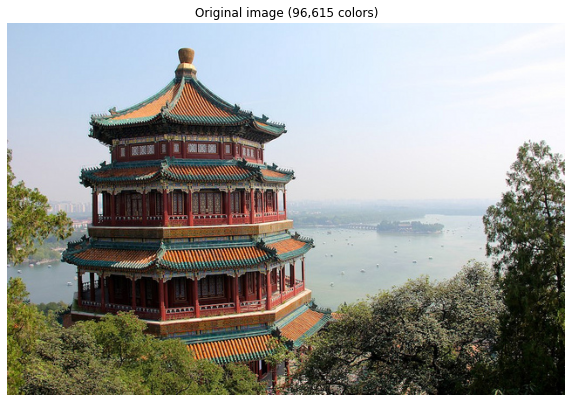

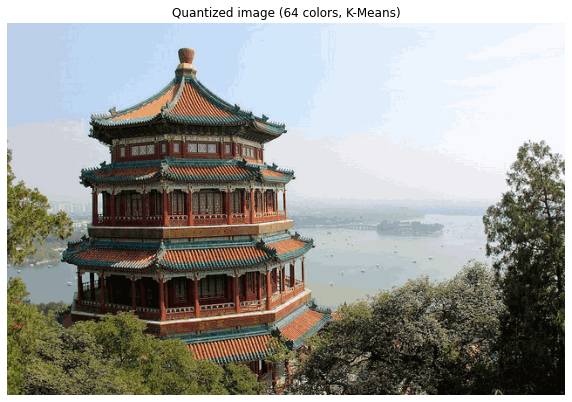

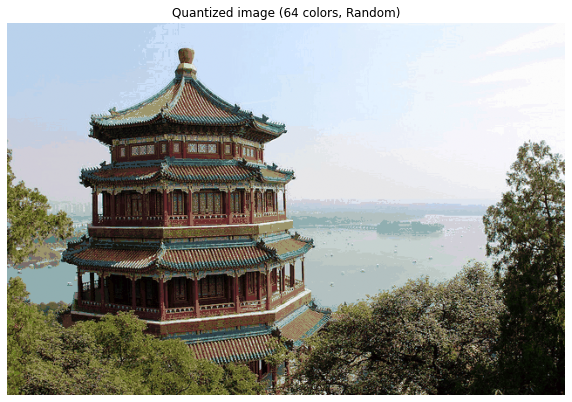

In [62]:
title=['Original image (96,615 colors)'
       ,'Quantized image (64 colors, K-Means)'
      ,'Quantized image (64 colors, Random)']
image_data=[china,image_kmeans.reshape(w,h,3),image_random.reshape(w,h,3)]
for i,j in enumerate(image_data):
    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.title(title[i])
    plt.imshow(j)
    plt.show()
